In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


### <font color='red'>Problem Statement
 Salary_hike -> Build a prediction model for Salary_hike
<br>------------------------------------------------------------<br>
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
 

### Salary_hike

In [3]:
df= pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### checking homoscedasticity and heteroscedasticity

Text(0.5, 1.0, 'Homoscedasticity')

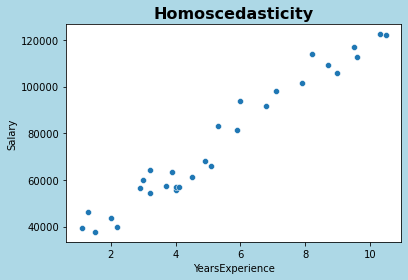

In [5]:
plt.subplots(figsize = (6,4),facecolor='lightblue')
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.title('Homoscedasticity',fontweight='bold',fontsize=16)

#### from above we can observe that the residual term is constant across observations i,e, variance is constant hence I can say that it is Homoscedasticity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'log-normal distribution')

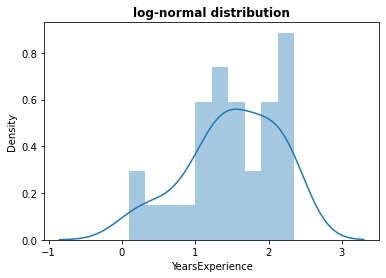

In [6]:
# Trying log normal distribution for transformation of data and removing the skewness 
sns.distplot(np.log(df['YearsExperience']),bins=10,kde=True)
plt.title('log-normal distribution',fontweight='bold')

Text(0.5, 1.0, 'Cube root transformation')

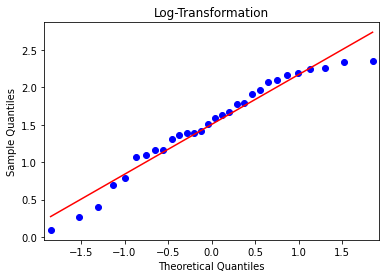

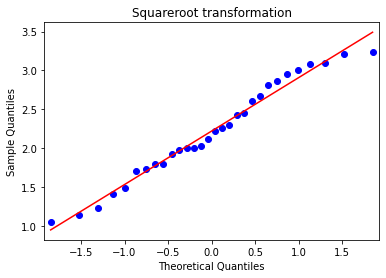

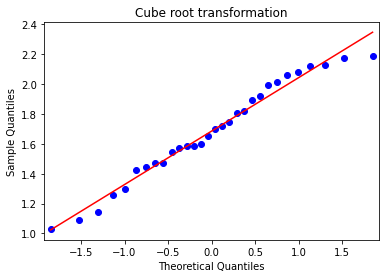

In [7]:
import statsmodels.api as smf
smf.qqplot(np.log(df['YearsExperience']),line='r')
plt.title('Log-Transformation')
smf.qqplot(np.sqrt(df['YearsExperience']),line='r')
plt.title('Squareroot transformation')
smf.qqplot(np.cbrt(df['YearsExperience']),line='r')
plt.title('Cube root transformation')

Text(0.5, 1.0, 'Cube root transformation')

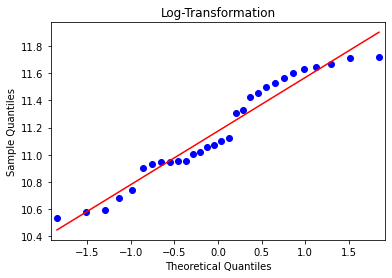

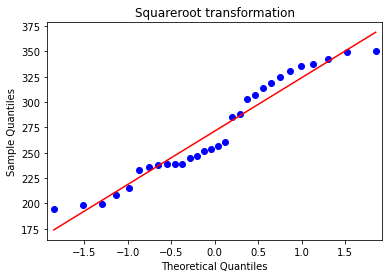

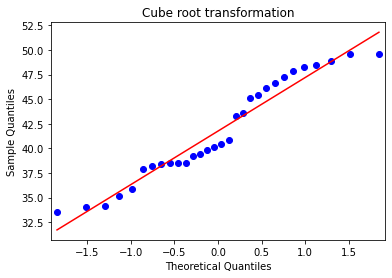

In [8]:
smf.qqplot(np.log(df['Salary']),line='r')
plt.title('Log-Transformation')
smf.qqplot(np.sqrt(df['Salary']),line='r')
plt.title('Squareroot transformation')
smf.qqplot(np.cbrt(df['Salary']),line='r')
plt.title('Cube root transformation')

##### As I can see that by applying log normal distribution the values has been scaled down which it follows a normal distribution

In [9]:
# Splitting the data into training set and test set
# 30 observations we are splitting into 20 observations for training set and 10 observations for test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [10]:
# fitting the Simple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

##### Our model is ready to predict the output for the new observations. we will provide the test dataset to the model to check whether it can predict the correct output or not . We will create a prediction vector y_pred,x_pred which will contain predictions of test dataset and predictions of training set respectively

In [11]:
#predicting the test set result
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)



In [12]:
# Applying root mean square error to conclude that difference between the actual and predicted needed to be minimum
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('mean square error: ',mse)
print('root mean square error: ',rmse)


mean square error:  21026037.329511296
root mean square error:  4585.4157204675885


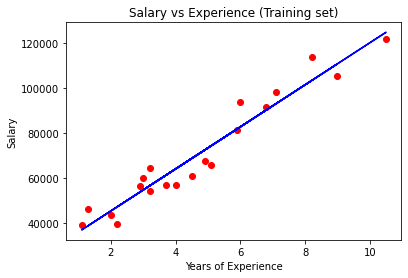

In [13]:
# Visualizing the training dataset result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, x_pred, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

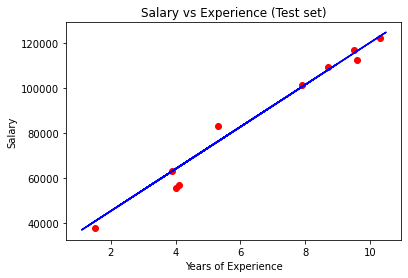

In [14]:
# Visualizing the test dataset
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, x_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
#for example predicting more values
X = ([5,6,4.3,8])
X = pd.DataFrame(X)
Y = regressor.predict(X)
Y= pd.DataFrame(Y)
df1 = pd.concat([X,Y],axis=1,keys=['Experience','Predicted_salary'])
df1

,Experience,Predicted_salary
,0,0
0,5.0,73545.904460
1,6.0,82891.846903
2,4.3,67003.744749
3,8.0,101583.731789
